### LIVE CODE 1

IRFAN FAHMUDDIN MA'RUF (DS 010)

### PROBLEMS

Kamu adalah salah satu tim relawan back office penanganan COVID-19 di Indonesia. Kamu diminta untuk memperoleh data baru dari dataset yang sudah disediakan. Kerjakan dan jawab pertanyaan-pertanyaan berikut. (Dataset yang disediakan merupakan jumlah kasus kumulatif tiap harinya)

1.  Buatlah sebuah fungsi untuk menghitung penambahan jumlah kasus harian Covid-19 dari data kumulatif yang disediakan! (Hint: Kamu bisa menggunakan .diff() yang disediakan oleh Pandas untuk menghitung perbedaan tiap baris data/menghitung penambahan jumlah kasus harian dan perhatikan missing value setelah perhitungan kasus harian, isi missing value dengan angka 0!)
2.  Buat variabel baru yang berisikan data penambahan jumlah kasus positif harian Covid-19 di dunia menggunakan fungsi yang telah kamu buat sebelumnya!
3.  Pada tanggal berapa puncak tertinggi kasus harian Covid-19 di Indonesia? bandingkan dengan tanggal 10 April 2022, apakah mengalami penurunan atau kenaikan jumlah kasus dibandingkan tanggal tersebut? (Kamu bisa gunakan pandas query untuk hal ini)
4.  Gunakan for loop dan conditional if untuk membuat sebuah list yang berisikan penambahan jumlah kasus harian Covid-19 dengan ketentuan hanya mengambil data Indonesia saja dan jumlah kasus di bawah 10000. Berapa jumlah hari dengan kasus di bawah 10000? (Gunakan for loop dan conditional if dalam hal ini)

In [1]:
# Import pustaka

import pandas as pd
import numpy as np

In [7]:
# data loading
# melakukan input terhadap data yang diperlukan

data= pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/data_covid_dunia_13_apr_22.csv')
data

,Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,4/9/22,177974,274191,265720,40328,99194,11,7511,9052083,422662,...,893575,238040,5125,521373,10169929,656287,535,11813,317483,246925
809,4/10/22,177974,274219,265724,40328,99194,11,7511,9052536,422677,...,893909,238071,5480,521471,10198236,656287,535,11813,317483,246958
810,4/11/22,178141,274219,265727,40328,99194,11,7511,9054126,422678,...,894267,238088,5487,521471,10250160,656287,535,11814,317804,247010
811,4/12/22,178257,274272,265730,40328,99194,11,7523,9056203,422691,...,894630,238098,5536,521546,10272964,656617,535,11814,317804,247094


## WORK AREA

Buatlah sebuah fungsi untuk menghitung penambahan jumlah kasus harian Covid-19 dari data kumulatif yang disediakan! (Hint: Kamu bisa menggunakan .diff() yang disediakan oleh Pandas untuk menghitung perbedaan tiap baris data/menghitung penambahan jumlah kasus harian dan perhatikan missing value setelah perhitungan kasus harian, isi missing value dengan angka 0!)

In [14]:
## cek missing value dahulu

data.isnull().sum()

<bound method NDFrame._add_numeric_operations.<locals>.sum of Unnamed: 0              0
Afghanistan             0
Albania                 0
Algeria                 0
Andorra                 0
                       ..
West Bank and Gaza      0
Winter Olympics 2022    0
Yemen                   0
Zambia                  0
Zimbabwe                0
Length: 285, dtype: int64>

In [18]:
data.dtypes

Unnamed: 0              object
Afghanistan              int64
Albania                  int64
Algeria                  int64
Andorra                  int64
                         ...  
West Bank and Gaza       int64
Winter Olympics 2022     int64
Yemen                    int64
Zambia                   int64
Zimbabwe                 int64
Length: 285, dtype: object

In [22]:
# mengubah kolom unnamed menjadi date

data.rename(columns={"Unnamed: 0": "Date"},inplace=True)

In [27]:
# set kolom date sebagai index nya. copy data terlebih dahulu
data_new= data
data_new.set_index('Date',inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [28]:
# cek apakah telah terupdate atau belum
data_new

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/9/22,177974,274191,265720,40328,99194,11,7511,9052083,422662,86887,...,893575,238040,5125,521373,10169929,656287,535,11813,317483,246925
4/10/22,177974,274219,265724,40328,99194,11,7511,9052536,422677,87634,...,893909,238071,5480,521471,10198236,656287,535,11813,317483,246958
4/11/22,178141,274219,265727,40328,99194,11,7511,9054126,422678,88543,...,894267,238088,5487,521471,10250160,656287,535,11814,317804,247010


In [122]:
data_new.diff(periods=1)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/9/22,0.0,55.0,6.0,0.0,0.0,0.0,0.0,840.0,19.0,785.0,...,566.0,46.0,203.0,48.0,34140.0,0.0,0.0,1.0,0.0,0.0
4/10/22,0.0,28.0,4.0,0.0,0.0,0.0,0.0,453.0,15.0,747.0,...,334.0,31.0,355.0,98.0,28307.0,0.0,0.0,0.0,0.0,33.0
4/11/22,167.0,0.0,3.0,0.0,0.0,0.0,0.0,1590.0,1.0,909.0,...,358.0,17.0,7.0,0.0,51924.0,0.0,0.0,1.0,321.0,52.0


Buat variabel baru yang berisikan data penambahan jumlah kasus positif harian Covid-19 di dunia menggunakan fungsi yang telah kamu buat sebelumnya!

In [31]:
## menghitung penambahan kasus dan mencetak sebagai variabel baru
# deklarasikan sebagai variabel baru
penambahan_data = data_new.diff(periods=1)
penambahan_data


,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/9/22,0.0,55.0,6.0,0.0,0.0,0.0,0.0,840.0,19.0,785.0,...,566.0,46.0,203.0,48.0,34140.0,0.0,0.0,1.0,0.0,0.0
4/10/22,0.0,28.0,4.0,0.0,0.0,0.0,0.0,453.0,15.0,747.0,...,334.0,31.0,355.0,98.0,28307.0,0.0,0.0,0.0,0.0,33.0
4/11/22,167.0,0.0,3.0,0.0,0.0,0.0,0.0,1590.0,1.0,909.0,...,358.0,17.0,7.0,0.0,51924.0,0.0,0.0,1.0,321.0,52.0


Pada tanggal berapa puncak tertinggi kasus harian Covid-19 di Indonesia? bandingkan dengan tanggal 10 April 2022, apakah mengalami penurunan atau kenaikan jumlah kasus dibandingkan tanggal tersebut? (Kamu bisa gunakan pandas query untuk hal ini)

In [43]:
# tampilkan data pada kolom indonesia dengan data_new
# deklarasikan kedalam variabel baru

data_INA= data_new[['Indonesia']]
data_INA

,Indonesia
Date,
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
4/9/22,6031636
4/10/22,6032707
4/11/22,6033903


In [45]:
# cek deskripsi pada data_INA dengan fungsi berikut
 
data_INA.describe()

,Indonesia
count,8.130000e+02
mean,1.943067e+06
std,1.938677e+06
min,0.000000e+00
25%,1.307180e+05
50%,1.353834e+06
75%,4.198678e+06
max,6.036909e+06


In [47]:
# berdasarkan describe, max nilai kasus ialah sebesar 6036909
# cek nilai tersebut terjadi pada tanggal berapa
data_INA.loc[data_INA['Indonesia']==6036909]

,Indonesia
Date,
4/13/22,6036909


diketahui terjadi pada tanggal 13 April 2022 mendapatkan nilai puncak

In [49]:
# cek nilai kasus pada tanggal 10 April 2022
data_INA.loc['4/10/22']

Indonesia    6032707
Name: 4/10/22, dtype: int64

In [62]:
# tampilkan data antara 10- 14 April 2022
data_INA.loc['4/10/22':'4/13/22']
    

,Indonesia
Date,
4/10/22,6032707
4/11/22,6033903
4/12/22,6035358
4/13/22,6036909


<AxesSubplot:xlabel='Date'>

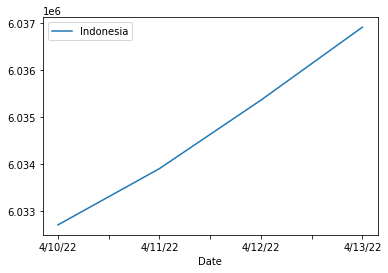

In [64]:
# melihat tren  nilai antara 10 April dengan 13 April
%matplotlib inline
data_INA.loc['4/10/22':'4/13/22'].plot()

Gunakan for loop dan conditional if untuk membuat sebuah list yang berisikan penambahan jumlah kasus harian Covid-19 dengan ketentuan hanya mengambil data Indonesia saja dan jumlah kasus di bawah 10000. Berapa jumlah hari dengan kasus di bawah 10000? (Gunakan for loop dan conditional if dalam hal ini)

In [65]:
# cek data ulang

data_INA

,Indonesia
Date,
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
4/9/22,6031636
4/10/22,6032707
4/11/22,6033903


In [119]:
# filter data sesuai kriteria dan deklarasikan sebagai variabel baru
data_INA_filter= data_INA[
    (data_INA['Indonesia']< 10000)
]
data_INA_filter

,Indonesia,menggunakan_loop
Date,,
1/22/20,0,NaN
1/23/20,0,0.0
1/24/20,0,0.0
1/25/20,0,0.0
1/26/20,0,0.0
...,...,...
4/25/20,8607,-8211.0
4/26/20,8882,-8607.0
4/27/20,9096,-8882.0


In [109]:
data_INA.iloc[:,0]

Date
1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
4/9/22     6031636
4/10/22    6032707
4/11/22    6033903
4/12/22    6035358
4/13/22    6036909
Name: Indonesia, Length: 813, dtype: int64

In [117]:
perbedaan_baru = data_INA_filter.diff()
perbedaan_baru # variabel data yang telah dihitung perbedaan nilai tiap baris dengan diff()

,Indonesia,menggunakan_loop
Date,,
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0
...,...,...
4/25/20,396.0,792.0
4/26/20,275.0,550.0
4/27/20,214.0,428.0


In [123]:
# 
hasil_INA=[]

for i in range(len(data_INA_filter)):
    tambah = data_INA_filter.iloc[i,0] - perbedaan_baru.iloc[i,0]
    
    hasil_INA.append(tambah) # simpan hasil per baris ke list kosong

data_INA_filter['menggunakan_loop']= hasil_INA

<ipython-input-123-687718265293>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_INA_filter['menggunakan_loop']= hasil_INA


In [124]:
hasil_INA

[nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 4.0,
 6.0,
 19.0,
 27.0,
 34.0,
 34.0,
 69.0,
 96.0,
 117.0,
 134.0,
 172.0,
 227.0,
 311.0,
 369.0,
 450.0,
 514.0,
 579.0,
 686.0,
 790.0,
 893.0,
 1046.0,
 1155.0,
 1285.0,
 1414.0,
 1528.0,
 1677.0,
 1790.0,
 1986.0,
 2092.0,
 2273.0,
 2491.0,
 2738.0,
 2956.0,
 3293.0,
 3512.0,
 3842.0,
 4241.0,
 4557.0,
 4839.0,
 5136.0,
 5516.0,
 5923.0,
 6248.0,
 6575.0,
 6760.0,
 7135.0,
 7418.0,
 7775.0,
 8211.0,
 8607.0,
 8882.0,
 9096.0,
 9511.0]